<img src="mrc.png" alt="Description de l'image" width="1400" height="100">

## <span style="color: red;">CONSULTANCY DATA ANALYSIS</span>

#### <span style="color: red;"> 1. Load Packages</span>

In [61]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     
import seaborn as sns  
import missingno as msn   
import janitor
import re                                     

#### <span style="color: red;">2. Load the dataset</span>

In [62]:
# Load the dataset
df = pd.read_csv('LEO_18037_WANETAM2_CHILDHOODTB_Dataset.csv')

# Load the data dictionary
dictionnary = pd.read_csv('LEO_18037_WANETAM2_CHILDHOODTB_DataDictionary.csv')

# check the shape of the dataset
df.shape

(228, 82)

**The  dataset contains 228 rows, representing the number of observations, and  82  columns, representing the number of variables.**

#### <span style="color: red;">3. Data Exploration Analysis</span>

In [63]:
# Varible description
description = dictionnary[["Variable / Field Name", "Field Type", "Field Label"]]

pd.set_option('display.max_rows',None)


# save as a csv file
description.to_csv('dict.csv', index=False)

description

,Variable / Field Name,Field Type,Field Label
0,q1_pre_tb,text,1) Participant ID
1,q1a_pre_tb,text,1a) Hospital Record Identification
2,q2_pre_tb,text,2) Date
3,q3_pre_tb,text,3) Patient's initials
4,q4_pre_tb,yesno,4) Is date of birth known
5,q4a_pre_tb,text,4a) Date of birth
6,q4b_pre_tb,calc,4b) Age
7,q4c_pre_tb,calc,4c) Age
8,q5_pre_tb,yesno,5) Is age known
9,q5b_pre_tb,text,"5b) Age if up to 5 years, enter in months"


In [64]:
["q1a_pre_tb",  "q2_pre_tb", "q3_pre_tb", "q4_pre_tb", "q4a_pre_tb", "q4b_pre_tb", "q4c_pre_tb", "q5_pre_tb", "q5b_pre_tb", "redcap_data_access_group", "appuser"]

['q1a_pre_tb',
 'q2_pre_tb',
 'q3_pre_tb',
 'q4_pre_tb',
 'q4a_pre_tb',
 'q4b_pre_tb',
 'q4c_pre_tb',
 'q5_pre_tb',
 'q5b_pre_tb',
 'redcap_data_access_group',
 'appuser']

In [65]:
# Check the data types of the columns 
print(df.dtypes)

q1_pre_tb                     object
redcap_data_access_group      object
q1a_pre_tb                    object
q2_pre_tb                     object
q3_pre_tb                     object
q4_pre_tb                    float64
q4a_pre_tb                    object
q4b_pre_tb                   float64
q4c_pre_tb                   float64
q5_pre_tb                    float64
q5b_pre_tb                   float64
q6_pre_tb                    float64
q7_pre_tb                    float64
q8_pre_tb                    float64
q9_pre_tb                    float64
q10_pre_tb                   float64
q11_pre_tb                   float64
q12_pre_tb                   float64
q13_pre_tb                   float64
q14_pre_tb                   float64
q15_pre_tb                   float64
q16_pre_tb                   float64
q17_pre_tb                   float64
q18_pre_tb                   float64
q19_pre_tb                   float64
q20_pre_tb                   float64
q21_pre_tb                   float64
q

In [66]:
# Check the first few rows of the dataset
display(df.head())

,q1_pre_tb,redcap_data_access_group,q1a_pre_tb,q2_pre_tb,q3_pre_tb,q4_pre_tb,q4a_pre_tb,q4b_pre_tb,q4c_pre_tb,q5_pre_tb,q5b_pre_tb,q6_pre_tb,q7_pre_tb,q8_pre_tb,q9_pre_tb,q10_pre_tb,q11_pre_tb,q12_pre_tb,q13_pre_tb,q14_pre_tb,q15_pre_tb,q16_pre_tb,q17_pre_tb,q18_pre_tb,q19_pre_tb,q20_pre_tb,q21_pre_tb,q22_pre_tb,q23_pre_tb,q24_pre_tb,q25_pre_tb,q26_pre_tb,q27_pre_tb,q28_pre_tb,q29_pre_tb,q30_pre_tb,q31_pre_tb,q32_pre_tb,q32b_pre_tb,q33_pre_tb,q33b_pre_tb,q34_pre_tb,q34b_pre_tb,q35_pre_tb,q35b_pre_tb,q36_pre_tb,q36a_pre_tb,q37_pre_tb,q38_pre_tb,q39_pre_tb,q40_pre_tb,q41_pre_tb,q42_pre_tb,q43_pre_tb,q44_pre_tb,q44a_pre_tb,q45_pre_tb,q46_pre_tb,q47_pre_tb,q48_pre_tb,q49_pre_tb,q50_pre_tb,q50a_pre_tb,q51_pre_tb,q52_pre_tb,q53_pre_tb,q54_pre_tb,q55_pre_tb,q56_pre_tb,q57_pre_tb,q58_pre_tb,q58a_pre_tb,q59_pre_tb,q60_pre_tb,q61_pre_tb,q62_pre_tb,q63_pre_tb,q64_pre_tb,q65_pre_tb,q66_pre_tb,appuser,presumed_tb_form_complete
0,BEN001,dc_benin,1/2020,2020-05-05,AH,0.0,NaN,NaN,NaN,1.0,8.0,NaN,2.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,38.0,1.0,4.0,1.0,59.0,0.0,NaN,0.0,NaN,48.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,1.0,2020-04-09,2.0,2.0,1.0,acute pneumoniae,2.0,0.0,2020-05-04,NaN,0.0,2.0,0.0,0.0,NaN,NaN,NaN,4.0,0.0,3.0,no,pneumonia,0.0,afiogbe,2
1,BEN003,dc_benin,NaN,2020-04-28,IS,0.0,NaN,NaN,NaN,1.0,NaN,14.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,38.1,1.0,25.0,1.0,134.0,0.0,NaN,0.0,NaN,40.0,1.0,0.0,3.0,0.0,0.0,3.0,0.0,NaN,NaN,1.0,2020-04-17,2.0,3.0,0.0,NaN,1.0,0.0,2020-04-28,1.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,2.0,1.0,3.0,no EPTB,lymphoma,0.0,afiogbe,2
2,BEN004,dc_benin,NaN,2020-04-30,MA,0.0,NaN,NaN,NaN,1.0,NaN,14.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,39.0,1.0,31.0,1.0,150.0,1.0,17.0,0.0,NaN,32.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,2020-04-26,2.0,2.0,0.0,NaN,1.0,0.0,2020-04-29,1.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,4.0,0.0,3.0,an acute community pneumonia,NaN,0.0,afiogbe,2
3,BEN005,dc_benin,NaN,2020-05-06,KC,0.0,NaN,NaN,NaN,1.0,29.0,NaN,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,37.0,0.0,NaN,1.0,86.0,0.0,NaN,0.0,NaN,28.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2020-05-06,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,4.0,1.0,3.0,NaN,pneumocystis,0.0,afiogbe,2
4,BEN0059,dc_benin,NaN,2021-03-18,AA,0.0,NaN,NaN,NaN,1.0,NaN,5.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,38.2,1.0,20.0,1.0,111.0,0.0,NaN,0.0,NaN,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,2021-03-17,2.0,2.0,0.0,NaN,1.0,0.0,2021-03-18,1.0,0.0,3.0,0.0,0.0,NaN,NaN,NaN,4.0,2.0,3.0,not an EPTB,other pneumonia,0.0,afiogbe,2


<Axes: >

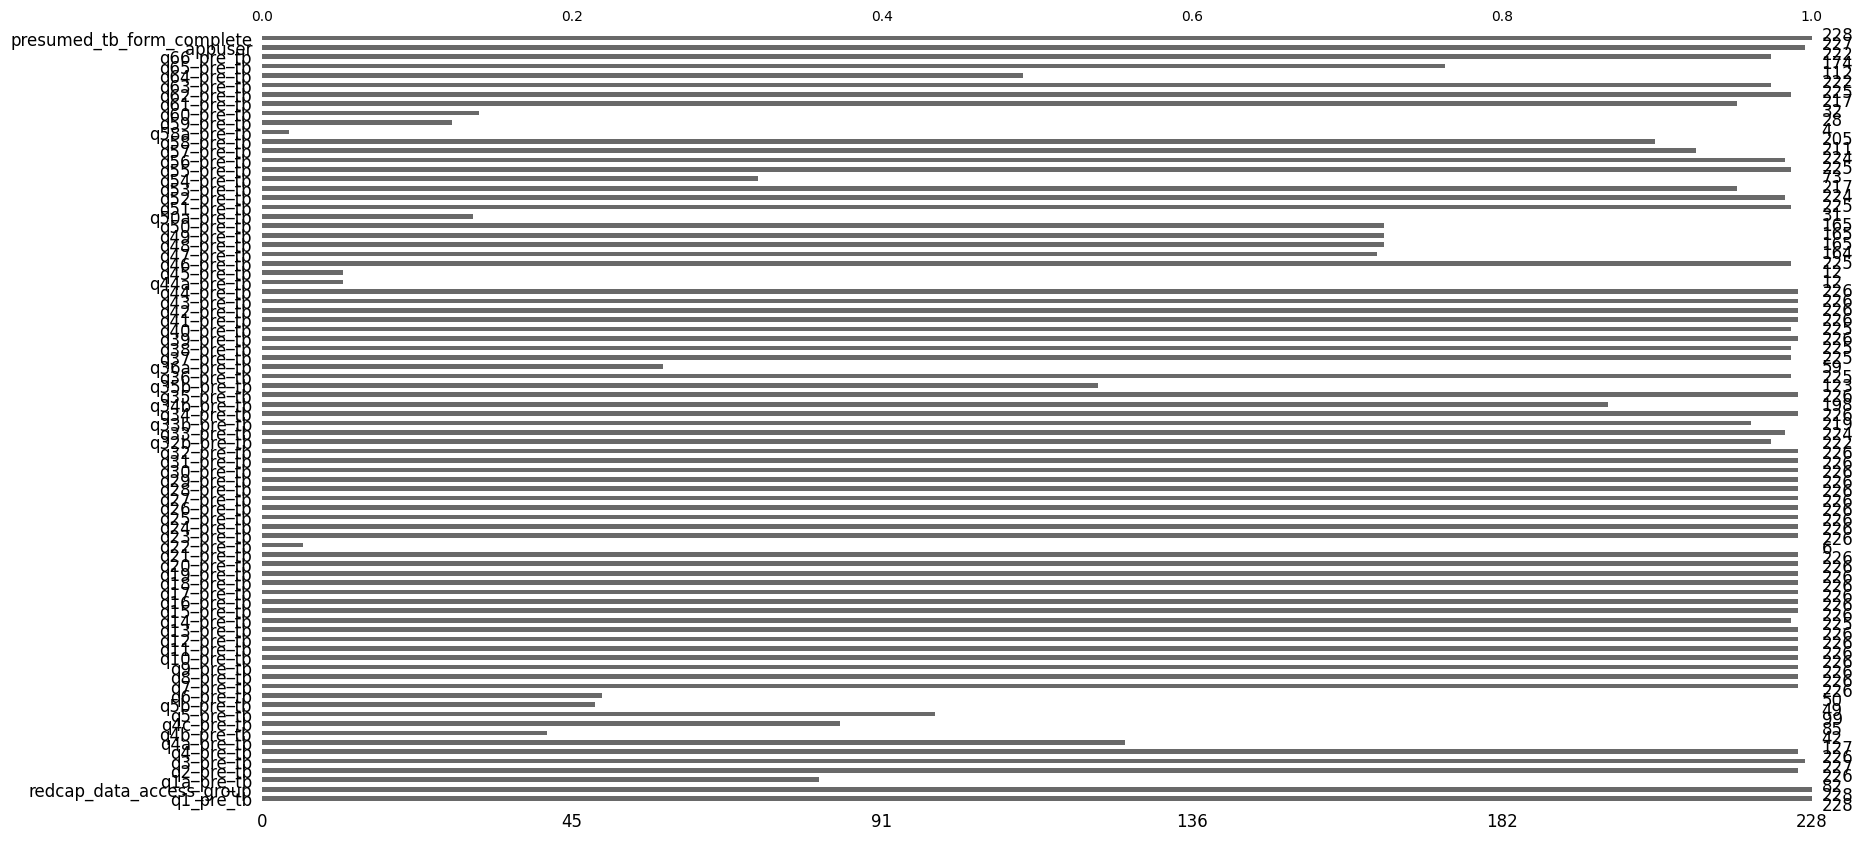

In [67]:
# Representation of missing values in the dataset 
msn.bar(df, figsize=(20, 10), fontsize=12)

In [68]:
# Age Calculation Based on Multiple Columns
def compute_age(row):
    if pd.notnull(row['q4b_pre_tb']):
        return row['q4b_pre_tb']
    elif pd.notnull(row['q6_pre_tb']):
        return row['q6_pre_tb']
    elif pd.notnull(row['q4c_pre_tb']):
        return round(row['q4c_pre_tb'] / 12, 2)
    elif pd.notnull(row['q5b_pre_tb']):
        return round(row['q5b_pre_tb'] / 12, 2)
    else:
        return None

df['Age'] = df.apply(compute_age, axis=1)

In [69]:
# Data cleaning
df = (
    df
    .clean_names()
    .replace(  # Replace invalid values with NaN
        to_replace=r"^\s*$|^[-_]+$|^(n/a|na|null|none|unknown|\?)$",
        value=pd.NA,
        regex=True
    )
    .drop_duplicates(subset='q1_pre_tb')
)

In [70]:
# Drop the specified columns
df = df.drop(columns=["q1a_pre_tb", "q2_pre_tb", "q3_pre_tb", "q4_pre_tb", 
                      "q4a_pre_tb", "q4b_pre_tb", "q4c_pre_tb", "q5_pre_tb", 
                      "q5b_pre_tb", "q6_pre_tb",  "redcap_data_access_group", "appuser"])


In [71]:
df['q1_pre_tb']

0           BEN001
1           BEN003
2           BEN004
3           BEN005
4          BEN0059
5           BEN006
6           BEN007
7           BEN008
8           BEN009
9           BEN010
10          BEN011
11          BEN012
12          BEN013
13          BEN014
14          BEN015
15          BEN016
16          BEN017
17          BEN018
18          BEN019
19           BEN02
20          BEN020
21          BEN021
22          BEN022
23          BEN023
24          BEN024
25          BEN025
26          BEN026
27          BEN027
28          BEN028
29          BEN029
30          BEN030
31          BEN031
32          BEN032
33          BEN033
34          BEN034
35          BEN035
36          BEN036
37          BEN037
38          BEN038
39          BEN039
40          BEN040
41          BEN041
42          BEN042
43          BEN043
44          BEN044
45          BEN045
46          BEN046
47          BEN047
48          BEN048
49          BEN049
50          BEN050
51          BEN051
52          

In [73]:
# Inspect Missing Values
missing_values = df.isnull().sum()
missing_proportions = missing_values / len(df )
missing_df = pd.concat([missing_values, missing_proportions], axis=1)

missing_df.columns = ['Number of Missing Values', 'Proportion of Missing Values']
missing_df = missing_df.sort_values('Proportion of Missing Values', ascending=False)

display(missing_df)

,Number of Missing Values,Proportion of Missing Values
q58a_pre_tb,224,0.982456
q22_pre_tb,222,0.973684
q45_pre_tb,216,0.947368
q44a_pre_tb,216,0.947368
q59_pre_tb,200,0.877193
q50a_pre_tb,197,0.864035
q60_pre_tb,196,0.859649
q36a_pre_tb,169,0.741228
q54_pre_tb,155,0.679825
q64_pre_tb,116,0.508772
